<a href="https://colab.research.google.com/github/35Upesh/Machine-Learning-Algorithms/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [109]:
df_sal = pd.read_csv('Position_Salaries.csv')
df_sal.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [110]:
df_sal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


<ipython-input-111-49ca4bc214a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


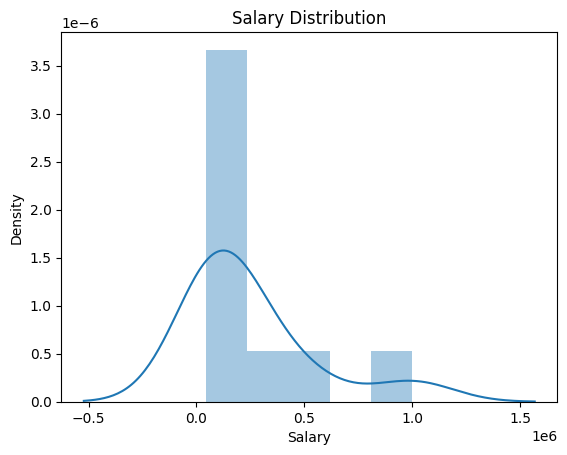

In [111]:
plt.title('Salary Distribution')
sns.distplot(df_sal['Salary'])
plt.show()

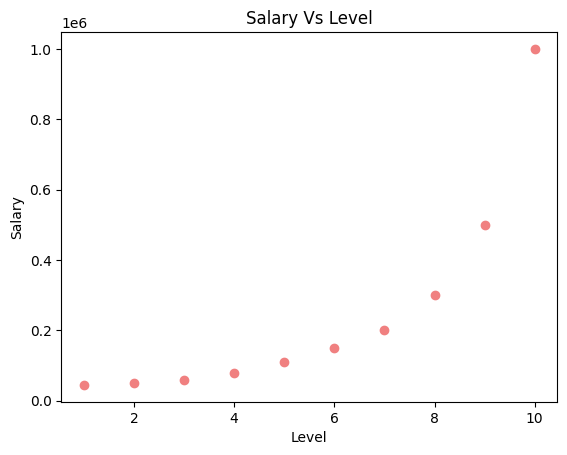

In [112]:
plt.scatter(df_sal['Level'], df_sal['Salary'], color='lightcoral')
plt.title('Salary Vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [113]:
X = df_sal.iloc[:, 1:-1]
y = df_sal.iloc[:, -1]

In [114]:
y = np.array(y)
y = y.reshape(len(y), 1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [115]:
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [116]:
y_pred = regressor.predict(X)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(len(y_pred), 1)
y_pred.shape
y_pred = sc_y.inverse_transform(y_pred)

y_pred = y_pred.flatten()
y_pred = y_pred.reshape(len(y_pred), 1)

<ipython-input-117-ed6eb8802a77>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


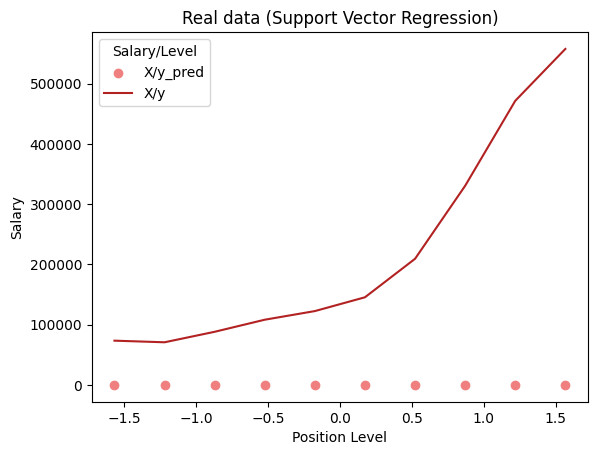

In [117]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X,y,color='lightcoral')
plt.plot(X,y_pred,color='firebrick')
plt.title('Real data (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.show()

In [118]:
print(sc_y.inverse_transform([regressor.predict(sc_X.transform([[7.5]]))]))

[[263740.85328003]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
